# Parallel construction of circuits

In this notebook we try to prepare all the circuits beforehand, and then simulate them all at once.

In [ ]:
import math
import numpy as np
from qiskit import (
    QuantumCircuit,
    ClassicalRegister,
    QuantumRegister,
    execute,
    Aer,
    BasicAer
    )
from qiskit.tools.visualization import plot_histogram, plot_state_city, plot_bloch_multivector
import matplotlib.pyplot as plt
import random
import qiskit

In [ ]:
q = QuantumRegister(1,"q")
c = ClassicalRegister(1,"c")
circuit = QuantumCircuit(q,c)
circuit.h(q)
circuit.measure(q,c)

In [ ]:
backend = BasicAer.get_backend('statevector_simulator')
job = execute(circuit, backend)
result = job.result()
output_state = result.get_statevector(circuit, decimals=2)
print("state vector after circuit:", output_state)
print(circuit.draw())


In [ ]:
simulator = Aer.get_backend('qasm_simulator')
job = execute(circuit, simulator, shots=1024)
result = job.result()
counts = result.get_counts(circuit)
print("\nTotal counts are:",counts)


In [ ]:
qc_list = [circuit,circuit]

In [ ]:
# Add to your import statements
from qiskit.compiler import transpile, assemble

# After creating qc_list
backend = Aer.get_backend('qasm_simulator')
transpiled_circs = transpile(qc_list, backend=backend)
qobjs = assemble(transpiled_circs, backend=backend)
job_info = backend.run(qobjs)

# To get the results
for circ_index in range(len(transpiled_circs)):
    print(job_info.result().get_counts(transpiled_circs[circ_index]))

In [40]:
import math
import numpy as np
from qiskit import (
    QuantumCircuit,
    ClassicalRegister,
    QuantumRegister,
    execute,
    Aer,
    BasicAer
    )
from qiskit.tools.visualization import plot_histogram, plot_state_city, plot_bloch_multivector
import matplotlib.pyplot as plt
import random
import qiskit

In [41]:
qiskit.__qiskit_version__

{'qiskit-terra': '0.10.0',
 'qiskit-aer': '0.3.2',
 'qiskit-ignis': '0.2.0',
 'qiskit-ibmq-provider': '0.3.3',
 'qiskit-aqua': '0.6.1',
 'qiskit': '0.13.0'}

# Definizione dei sign flip

$$SF_{N,j} = O_j (C^NZ) O_j$$

$$O_j = \otimes_{l=0}^{N-1} (NOT_l)^{1-j_l}$$

Facciamo $N=3$

$j=0$

In [42]:
N=4

In [43]:
inputVector = np.zeros(2**N)
inputVector[0] = 1
inputVector
# weightVector = [0,0,0,0,0,1,0,0]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

j rappresenta gli elementi della base computazionale

In [44]:
base_computazionale = np.zeros((2**N,N))
for i in range(2**N):
    for cifra in range(N):
        base_computazionale[i][cifra] = format(i, '0'+str(N)+'b')[N-1-cifra]
base_computazionale

# format(2,'0'+str(N)+'b')[2]

array([[0., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [1., 1., 0., 0.],
       [0., 0., 1., 0.],
       [1., 0., 1., 0.],
       [0., 1., 1., 0.],
       [1., 1., 1., 0.],
       [0., 0., 0., 1.],
       [1., 0., 0., 1.],
       [0., 1., 0., 1.],
       [1., 1., 0., 1.],
       [0., 0., 1., 1.],
       [1., 0., 1., 1.],
       [0., 1., 1., 1.],
       [1., 1., 1., 1.]])

In [45]:
q = QuantumRegister(N, 'q')

In [46]:
def O(circuit, N, j):
    O_circ = QuantumCircuit(q)
    for l in range(N):
        if j[l] == 0:
            O_circ.x(q[l])
    circuit += O_circ

def sf(circuit, N, j):
    SF = QuantumCircuit(q)
    O(SF, N, j)
    SF.barrier(q)
    SF.mcrz(np.pi, q[:N-1], q[N-1])
    SF.barrier(q)
    O(SF, N, j)
    
    circuit += SF

In [47]:
def U_i(circuit, inputVector):
    """
    Funione per codificare il vettore d'input.
    Da chiamare dentro il circuito principale.
    """
    u_i = QuantumCircuit(q)
    u_i.h(q)
    for (index, value) in enumerate(inputVector):
        # print("U_i, passo " + str(index))
        if inputVector[index]: sf(u_i, N, base_computazionale[index])
    circuit += u_i

In [48]:
def U_w(circuit, weightVector):
    """
    Funione per codificare il vettore d'input.
    Da chiamare dentro il circuito principale.
    """
    u_w = QuantumCircuit(q)
    for (index, value) in enumerate(weightVector):
        # print("U_w, passo " + str(index))
        if weightVector[index]: sf(u_w, N, base_computazionale[index])
    u_w.h(q)
    u_w.x(q)
    circuit += u_w

In [ ]:
circ = QuantumCircuit(q)
U_i(circ, inputVector)
circ.draw(output='mpl')
# mcrz(self, lam, q_controls, q_target, use_basis_gates=False)

In [49]:
def draw_state_vector(circ):
    """
        Input: 
            - circ (qiskit.circuit.quantumcircuit.QuantumCircuit) quantum circuit 
              to be executed
        Description:
            - Runs the quantum circuit and prints the resulting quantum state vector 
              and draws the circuit.
    """
    
    backend = BasicAer.get_backend('statevector_simulator')
    job = execute(circ, backend)
    result = job.result()
    output_state = result.get_statevector(circ, decimals=2)
    print("state vector after circuit:", output_state)
    print(circ.draw())

In [ ]:
inputVector

In [ ]:
inputVector = [0,0,0,0,0,0,0,1]
circ = QuantumCircuit(q)
U_i(circ, inputVector)
print(inputVector)
draw_state_vector(circ)

In [ ]:
inputVector = [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]
circ = QuantumCircuit(q)
U_i(circ, inputVector)
print(inputVector)
draw_state_vector(circ)

In [ ]:
inputVector = [0,0,0,0,0,1,0,0]
circ = QuantumCircuit(q)
U_i(circ, inputVector)
print(inputVector)
draw_state_vector(circ)

In [ ]:
print(inputVector)
circ = QuantumCircuit(q)
U_i(circ, inputVector)
draw_state_vector(circ)

In [ ]:
print(inputVector)
circ = QuantumCircuit(q)
U_i(circ, inputVector)
draw_state_vector(circ)

# Esecuzione del circuito completo

In [ ]:
inputVector = [1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0]

weightVector = [0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0]

In [50]:
def numtovect(k,N):
    m = 2**N
    v = np.zeros(m)
    binary_string = ("{:0%db}"%m).format(k)
    #convert k to an m-digit binary number
    #print(binary_string)
    v = list(map(lambda v, b : v**int(b), v, binary_string)) 
    return np.array(v)


In [ ]:
q = QuantumRegister(N, 'q')
a = QuantumRegister(1, 'a')
b = ClassicalRegister(1, 'b')
circ = QuantumCircuit(q,a,b)
U_i(circ, numtovect(3,N))
U_w(circ, weightVector)
# (theta, q_controls, q_target, use_basis_gates=False)
circ.mcrx(np.pi, q, a[0])
circ.measure(a, b)

draw_state_vector(circ)

In [ ]:
q = QuantumRegister(N, 'q')
a = QuantumRegister(1, 'a')
b = ClassicalRegister(1, 'b')
circ = QuantumCircuit(q,a,b)
U_i(circ, numtovect(0,N))
U_w(circ, numtovect(4, N))
# (theta, q_controls, q_target, use_basis_gates=False)
circ.mcrx(np.pi, q, a[0])
circ.measure(a, b)

# draw_state_vector(circ)

simulator = Aer.get_backend('qasm_simulator')
job = execute(circ, simulator, shots=1024)
result = job.result()
counts = result.get_counts(circ)
print("\nTotal counts are:",counts)
# plot_histogram(counts)

In [ ]:
simulator = Aer.get_backend('qasm_simulator')
job = execute(circ, simulator, shots=1024)
result = job.result()
counts = result.get_counts(circ)
print("\nTotal counts are:",counts)
# plot_histogram(counts)

In [ ]:
counts.get('0')

In [ ]:
numtovect(0,4)

In [ ]:
datetime.now().time().minute

In [ ]:
import datetime
datetime.timedelta(minutes=10)

In [ ]:
start = datetime.now()

In [ ]:
end = datetime.now()

In [ ]:
end - start

In [63]:
from datetime import datetime, timedelta

N = 3

base_computazionale = np.zeros((2**N,N))
for i in range(2**N):
    for cifra in range(N):
        base_computazionale[i][cifra] = format(i, '0'+str(N)+'b')[N-1-cifra]
base_computazionale

listaCircuiti = []

startTime = datetime.now()

print(datetime.now().time())
outcomes = np.zeros((2**(2**N),2**(2**N)))
for i in range(2**(2**N)):
    forTime0 = datetime.now()
    print("Vettore d'input #" + str(i))
    for w in range(2**(2**N)):
        q = QuantumRegister(N, 'q')
        a = QuantumRegister(1, 'a')
        b = ClassicalRegister(1, 'b')
        circ = QuantumCircuit(q,a,b)
        # print('Input vector: ' + str(numtovect(i,N)) + ' - Weight vector: ' + str(numtovect(w,N)))
        U_i(circ, numtovect(i,N))
        U_w(circ, numtovect(w, N))
        # (theta, q_controls, q_target, use_basis_gates=False)
        circ.mcrx(np.pi, q, a[0])
        circ.measure(a, b)

        listaCircuiti.append(circ)
        # draw_state_vector(circ)

        
    # forTime1 = datetime.now()
    # print("Tempo per un vettore d'input: " + str(forTime1 - forTime0))
endTime = datetime.now()
print(datetime.now().time())
print('Tempo di costruzione: ' + str(endTime - startTime))
print("Inizio l'assemblaggio di tutti i circuiti")
startTime = datetime.now()
# Add to your import statements
from qiskit.compiler import transpile, assemble

# After creating qc_list
backend = Aer.get_backend('qasm_simulator')
transpiled_circs = transpile(listaCircuiti, backend=backend)
qobjs = assemble(transpiled_circs, backend=backend)
job_info = backend.run(qobjs)

# To get the results

for circ_index in range(len(transpiled_circs)):
    counts = job_info.result().get_counts(transpiled_circs[circ_index])
    if len(counts) == 1:
        outcomes[int(int(circ_index)/int(2**(2**N)))][int(int(circ_index)%int(2**(2**N)))] = int([*counts][0]) # unpacking
    else:
        outcomes[int(int(circ_index)/int(2**(2**N)))][int(int(circ_index)%int(2**(2**N)))] = counts['1']/float(1024)
endTime = datetime.now()
print("Tempo di esecuzione:", endTime-startTime)
# simulator = Aer.get_backend('qasm_simulator')
# job = execute(circ, simulator, shots=1024)
# result = job.result()
# counts = result.get_counts(circ)
#print("\nTotal counts are:",counts)
# plot_histogram(counts)
# if len(counts) == 1:
#     outcomes[i][w] = int([*counts][0]) # unpacking
# else:
# outcomes[i][w] = counts['1']/float(1024)

19:41:07.021549
Vettore d'input #0
Vettore d'input #1
Vettore d'input #2
Vettore d'input #3
Vettore d'input #4
Vettore d'input #5
Vettore d'input #6
Vettore d'input #7
Vettore d'input #8
Vettore d'input #9
Vettore d'input #10
Vettore d'input #11
Vettore d'input #12
Vettore d'input #13
Vettore d'input #14
Vettore d'input #15
Vettore d'input #16
Vettore d'input #17
Vettore d'input #18
Vettore d'input #19
Vettore d'input #20
Vettore d'input #21
Vettore d'input #22
Vettore d'input #23
Vettore d'input #24
Vettore d'input #25
Vettore d'input #26
Vettore d'input #27
Vettore d'input #28
Vettore d'input #29
Vettore d'input #30
Vettore d'input #31
Vettore d'input #32
Vettore d'input #33
Vettore d'input #34
Vettore d'input #35
Vettore d'input #36
Vettore d'input #37
Vettore d'input #38
Vettore d'input #39
Vettore d'input #40
Vettore d'input #41
Vettore d'input #42
Vettore d'input #43
Vettore d'input #44
Vettore d'input #45
Vettore d'input #46
Vettore d'input #47
Vettore d'input #48
Vettore d'inpu

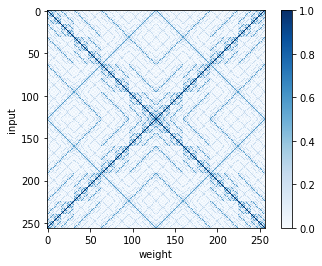

In [64]:
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
#ax.matshow(outcomes, cmap=plt.cm.Blues)
ax.set_xlabel("weight")
ax.set_ylabel("input")

out_plot = ax.imshow(outcomes, cmap='Blues', interpolation='none')
fig.colorbar(out_plot, ax=ax)

# fig.savefig('inputs_v_weights.png', dpi=1000)

In [ ]:
import dill
filename = 'citymap_N3.pkl'
dill.dump_session(filename)

# and to load the session again:
# dill.load_session(filename)

In [ ]:
(numtovect(34,3))

In [ ]:
N = 3
vectors = [numtovect(k,N) for k in range(2**(2**N))]
for i, v in enumerate(vectors):
    print("k=",i," ", v)

In [ ]:
c_cir(N,inputVector, weightVector)


In [ ]:

# Tempi in funzione di N (sequenziale)
# N - Tempo totale - Tempo medio per vettore d'input (riga)
# 2 - 0:00:15.781950 - 0:00:01.236381 * 16
# 3 - 4:24:20.956383 - 0:01:16.679671 * 256
# 4 - ?:??:??.?????? -  * 65536


# Tempi con il transpiling di Qiskit
# N - tot
# 2 - 0:00:06.797629
# 3 - 0:04:56.086619

In [ ]:
# Add to your import statements
from qiskit.compiler import transpile, assemble

# After creating qc_list
backend = Aer.get_backend('qasm_simulator')
transpiled_circs = transpile(qc_list, backend=backend)
qobjs = assemble(transpiled_circs, backend=backend)
job_info = backend.run(qobjs)

# To get the results
for circ_index in range(len(transpiled_circs)):
    print(job_info.result().get_counts(transpiled_circs[circ_index]))